## LoL: XGBoost Classifier, 
### Win Prediction model
##### zzznavarrete

In [2]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import pandas as pd
import numpy as np
import matplotlib.pylab as pl

In [3]:
X_train = pd.read_csv("./data/lol.x_train.csv")
y_train = pd.read_csv("./data/lol.y_train.csv")

y_train = y_train.iloc[:,1:]
X_train = X_train.iloc[:,1:]



In [22]:
X = pd.read_csv("./data/lol.x_train.csv")
X = X.iloc[:,1:]

In [4]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=31)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [10]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train.blueWins),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 1000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.68390
[100]	test-logloss:0.23466
[200]	test-logloss:0.10699
[300]	test-logloss:0.06038
[400]	test-logloss:0.04142
[500]	test-logloss:0.03291
[600]	test-logloss:0.02858
[700]	test-logloss:0.02586
[800]	test-logloss:0.02408
[900]	test-logloss:0.02277
[1000]	test-logloss:0.02174
[1100]	test-logloss:0.02094
[1200]	test-logloss:0.02035
[1300]	test-logloss:0.01983
[1400]	test-logloss:0.01944
[1500]	test-logloss:0.01908
[1600]	test-logloss:0.01877
[1700]	test-logloss:0.01847
[1800]	test-logloss:0.01821
[1900]	test-logloss:0.01799
[2000]	test-logloss:0.01778
[2100]	test-logloss:0.01763
[2200]	test-logloss:0.01752
[2300]	test-logloss:0.01738
[2400]	test-logloss:0.01724
[2500]	test-logloss:0.01712
[2600]	test-logloss:0.01701
[2700]	test-logloss:0.01692
[2800]	test-logloss:0.01684
[2900]	test-logloss:0.01675
[3000]	test-logloss:0.01668
[3100]	test-logloss:0.01662
[3200]	test-logloss:0.01656
[3300]	test-logloss:0.01649
[3327]	test-logloss:0.01649


In [72]:
def apply_threshold(probability: float, threshold_criteria: float) -> int:
    if probability >= threshold_criteria:
        return 1
    else:
        return 0

In [74]:
y_predict = model.predict(d_test)
y_predict_binary = [apply_threshold(x, 0.5) for x in y_predict]
y_test.values

In [83]:
y_test.values[0:15]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1]], dtype=int64)

In [84]:
y_predict_binary[0:15]

[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss, roc_auc_score
print(f"accuracy = {accuracy_score(y_test.values, y_predict_binary)}")
print(f"precision = {precision_score(y_test.values, y_predict_binary)}")
print(f"recall = {recall_score(y_test.values, y_predict_binary)}")
print(f"F1 score = {f1_score(y_test.values, y_predict_binary)}")


accuracy = 0.9940833333333333
precision = 0.994275130493349
recall = 0.9937731403567822
F1 score = 0.9940240720478074


In [90]:
log_loss(y_test.values, y_predict_binary, eps=1e-15)

0.2043566925292747

In [92]:
print(roc_auc_score(y_test.values, y_predict_binary))

0.9940803635095236


In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,13)

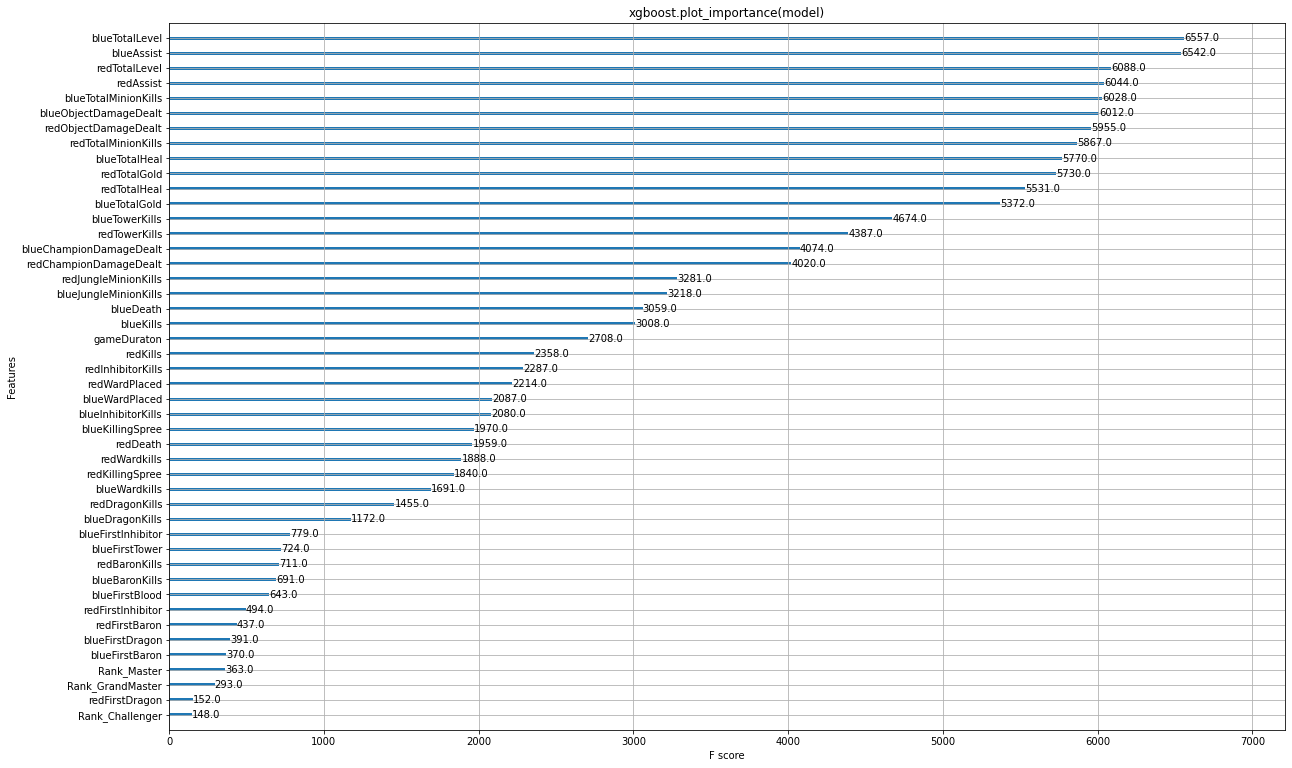

In [17]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

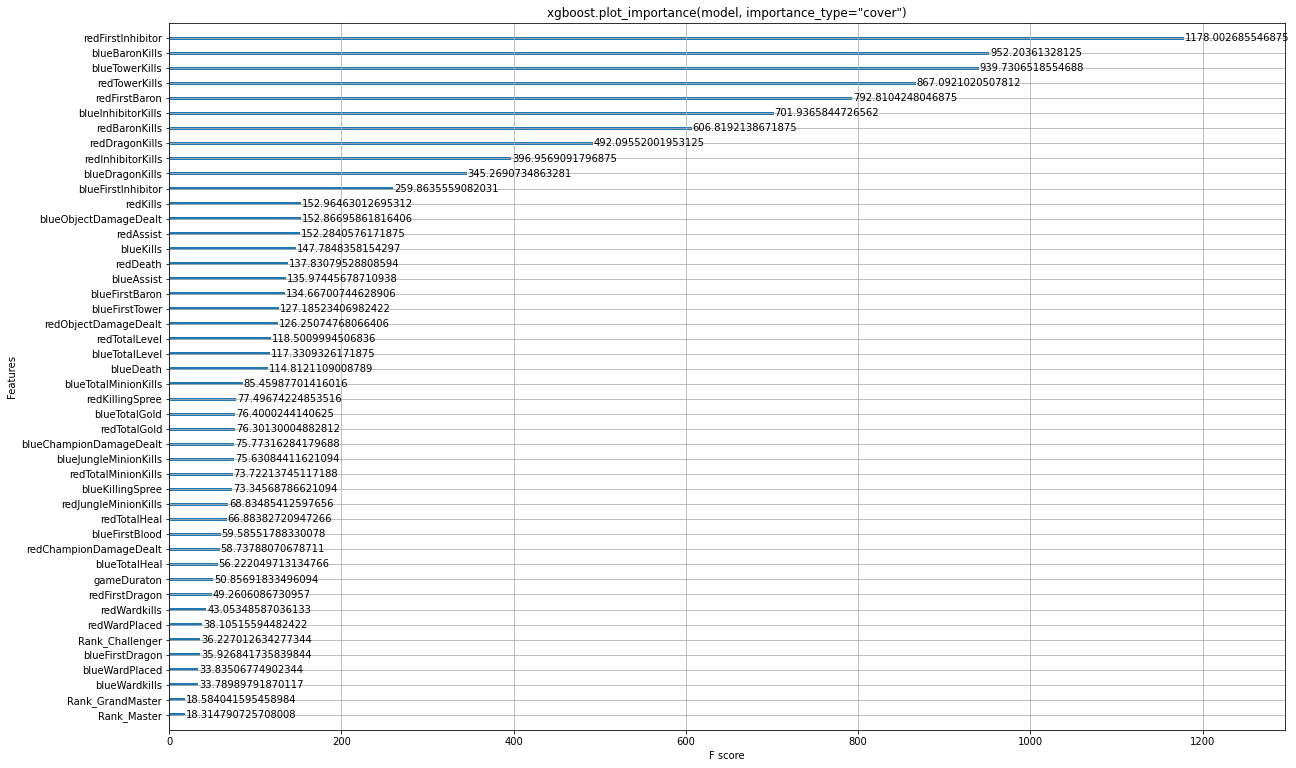

In [18]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

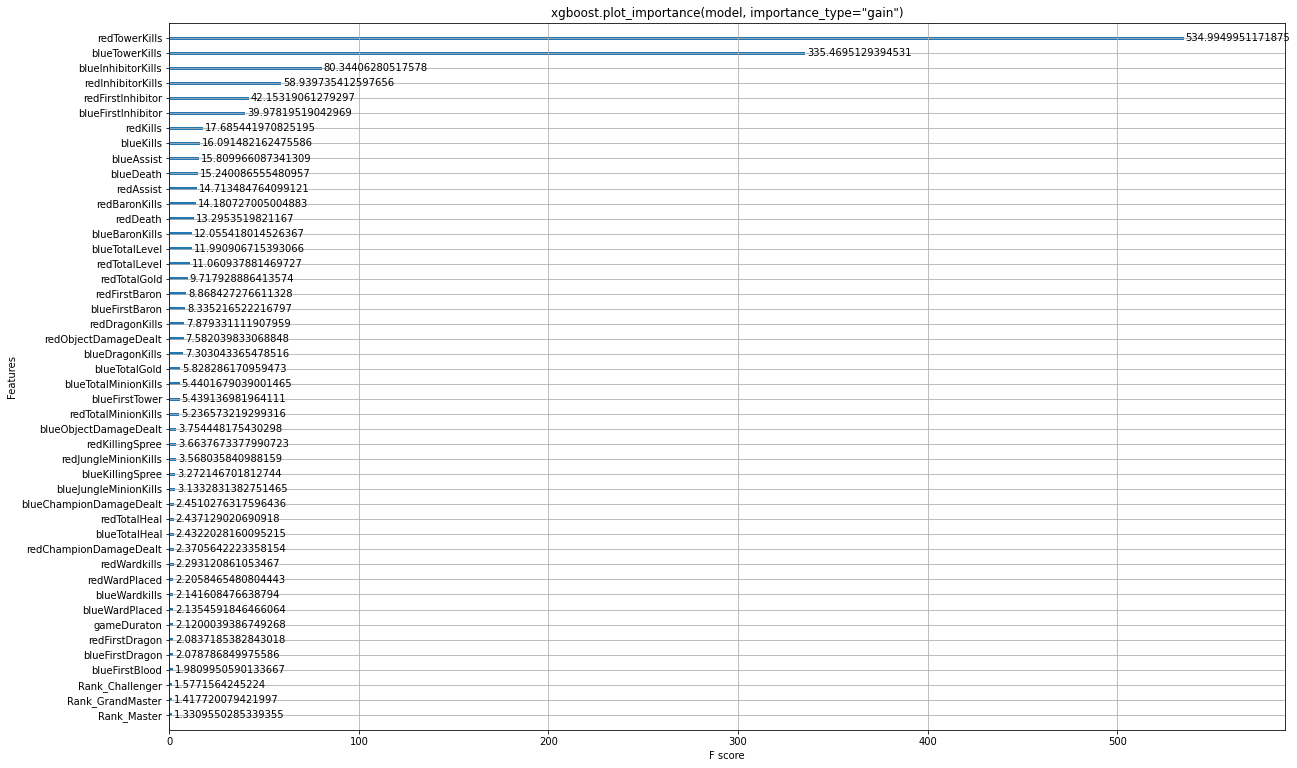

In [19]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [24]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

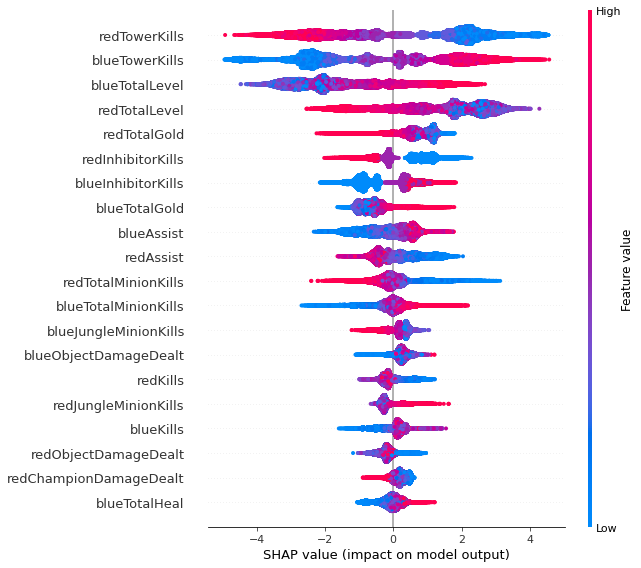

In [26]:
shap.summary_plot(shap_values, X)